# Virtual Environments and Requests Module

In [11]:
import requests
#r = requests.get("https://api.github.com/users/Connor-SM")
r = requests.get("https://api.github.com/users/grigoryMovchan")
print(r)
print(type(r))

<Response [200]>
<class 'requests.models.Response'>


In [12]:
data = r.content
print(data)

b'{"login":"grigoryMovchan","id":17019931,"node_id":"MDQ6VXNlcjE3MDE5OTMx","avatar_url":"https://avatars1.githubusercontent.com/u/17019931?v=4","gravatar_id":"","url":"https://api.github.com/users/grigoryMovchan","html_url":"https://github.com/grigoryMovchan","followers_url":"https://api.github.com/users/grigoryMovchan/followers","following_url":"https://api.github.com/users/grigoryMovchan/following{/other_user}","gists_url":"https://api.github.com/users/grigoryMovchan/gists{/gist_id}","starred_url":"https://api.github.com/users/grigoryMovchan/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/grigoryMovchan/subscriptions","organizations_url":"https://api.github.com/users/grigoryMovchan/orgs","repos_url":"https://api.github.com/users/grigoryMovchan/repos","events_url":"https://api.github.com/users/grigoryMovchan/events{/privacy}","received_events_url":"https://api.github.com/users/grigoryMovchan/received_events","type":"User","site_admin":false,"name":null,"compa

In [14]:
data = r.json()
for k, v in data.items():
    print("Key: {} \t Value: {}".format(k, v))
print(data["location"])

Key: login 	 Value: grigoryMovchan
Key: id 	 Value: 17019931
Key: node_id 	 Value: MDQ6VXNlcjE3MDE5OTMx
Key: avatar_url 	 Value: https://avatars1.githubusercontent.com/u/17019931?v=4
Key: gravatar_id 	 Value: 
Key: url 	 Value: https://api.github.com/users/grigoryMovchan
Key: html_url 	 Value: https://github.com/grigoryMovchan
Key: followers_url 	 Value: https://api.github.com/users/grigoryMovchan/followers
Key: following_url 	 Value: https://api.github.com/users/grigoryMovchan/following{/other_user}
Key: gists_url 	 Value: https://api.github.com/users/grigoryMovchan/gists{/gist_id}
Key: starred_url 	 Value: https://api.github.com/users/grigoryMovchan/starred{/owner}{/repo}
Key: subscriptions_url 	 Value: https://api.github.com/users/grigoryMovchan/subscriptions
Key: organizations_url 	 Value: https://api.github.com/users/grigoryMovchan/orgs
Key: repos_url 	 Value: https://api.github.com/users/grigoryMovchan/repos
Key: events_url 	 Value: https://api.github.com/users/grigoryMovchan/eve

In [19]:
r = requests.get("http://api.github.com/search/repositories?q=language:python")
data = r.json()
print(data["total_count"])

5417986


In [24]:
q = {'q' : 'language:python'}
r = requests.get("http://api.github.com/search/repositories", 
                 params = q)
data = r.json()
print(data["total_count"])

5615713


In [25]:
q = {'q' : 'language:javascript'}
r = requests.get("http://api.github.com/search/repositories", 
                 params = q)
data = r.json()
print(data["total_count"])

9930785


In [26]:
q = {'q' : 'language:php'}
r = requests.get("http://api.github.com/search/repositories", 
                 params = q)
data = r.json()
print(data["total_count"])

2601600


# Pandas

In [1]:
import pandas as pd

In [46]:
import random
random.seed(3)
names = ["Jess", "Jordan", "Sandy", "Ted", "Barney", "Tyler", "Rebecca"]
ages = [random.randint(18, 35) for x in range(len(names))]
people = {"names" : names, "ages" : ages}
df = pd.DataFrame.from_dict(people)
print(df)

     names  ages
0     Jess    25
1   Jordan    35
2    Sandy    22
3      Ted    29
4   Barney    33
5    Tyler    20
6  Rebecca    18


In [9]:
print(df["ages"])
print(df["ages"][3])
#print(df[4])

0    25
1    35
2    22
3    29
4    33
5    20
6    18
Name: ages, dtype: int64
29


In [13]:
print(df.loc[0])
print(df.loc[0]["names"])

name    Jess
ages      25
Name: 0, dtype: object
Jess


In [21]:
print(df[0:2])

     name  ages
0    Jess    25
1  Jordan    35


In [24]:
df.head(5)

,name,ages
0,Jess,25
1,Jordan,35
2,Sandy,22
3,Ted,29
4,Barney,33


In [25]:
df.tail(3)

,name,ages
4,Barney,33
5,Tyler,20
6,Rebecca,18


In [26]:
headers = df.keys()
print(headers)

Index(['name', 'ages'], dtype='object')


In [32]:
shape = df.shape
print(shape)

(7, 2)


In [33]:
df.describe()

,ages
count,7.000000
mean,26.000000
std,6.531973
min,18.000000
25%,21.000000
50%,25.000000
75%,31.000000
max,35.000000


In [40]:
df = df.sort_values("ages")
df.head(5)

,name,ages
6,Rebecca,18
5,Tyler,20
2,Sandy,22
0,Jess,25
3,Ted,29


In [41]:
can_drink = df["ages"] > 21
print(can_drink)

6    False
5    False
2     True
0     True
3     True
4     True
1     True
Name: ages, dtype: bool


In [42]:
df[df["ages"] > 21]

,name,ages
2,Sandy,22
0,Jess,25
3,Ted,29
4,Barney,33
1,Jordan,35


In [53]:
random.seed(321)
tenure = [random.randint(0, 10) for x in range(len(df))]
#print(tenure)
df["tenure"] = tenure
df.head(10)
df = df.sort_values("ages")
df.head(10)

,names,ages,tenure
6,Rebecca,18,5
5,Tyler,20,7
2,Sandy,22,2
0,Jess,25,4
3,Ted,29,5
4,Barney,33,8
1,Jordan,35,6


In [54]:
def ageGroup(age):
    return "Teenager" if age < 21 else "Adult"
df["age_group"] = df["ages"].apply(ageGroup)
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,5,Teenager
5,Tyler,20,7,Teenager
2,Sandy,22,2,Adult
0,Jess,25,4,Adult
3,Ted,29,5,Adult
4,Barney,33,8,Adult
1,Jordan,35,6,Adult


In [56]:
df.groupby("age_group", as_index=True).count().head()

,names,ages,tenure
age_group,,,
Adult,5,5,5
Teenager,2,2,2


In [57]:
df.groupby("age_group", as_index=False).count().head()

,age_group,names,ages,tenure
0,Adult,5,5,5
1,Teenager,2,2,2


In [64]:
df.groupby("age_group", as_index=False).mean().head()

,age_group,ages,tenure
0,Adult,28.8,5.0
1,Teenager,19.0,6.0


In [65]:
df.groupby(["age_group", "tenure"], as_index=False).count().head(10)

,age_group,tenure,names,ages
0,Adult,2,1,1
1,Adult,4,1,1
2,Adult,5,1,1
3,Adult,6,1,1
4,Adult,8,1,1
5,Teenager,5,1,1
6,Teenager,7,1,1


In [71]:
df.at[2, "tenure"] = 5

In [73]:
df.groupby(["age_group", "tenure"], as_index=False).count().head(10)

,age_group,tenure,names,ages
0,Adult,4,1,1
1,Adult,5,2,2
2,Adult,6,1,1
3,Adult,8,1,1
4,Teenager,5,1,1
5,Teenager,7,1,1


In [95]:
df.loc[7] = ["Jess", 25, 2, "Adult"]
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,5,Teenager
5,Tyler,20,7,Teenager
2,Sandy,22,5,Adult
0,Jess,25,4,Adult
3,Ted,29,5,Adult
4,Barney,33,8,Adult
1,Jordan,35,6,Adult
7,Jess,25,2,Adult


In [94]:
df = df.drop(10)

,names,ages,tenure,age_group
6,Rebecca,18,5,Teenager
5,Tyler,20,7,Teenager
2,Sandy,22,5,Adult
0,Jess,25,4,Adult
3,Ted,29,5,Adult
4,Barney,33,8,Adult
1,Jordan,35,6,Adult
7,25,Jess,2,Adult


In [97]:
df = df.drop_duplicates(subset = "names")
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,5,Teenager
5,Tyler,20,7,Teenager
2,Sandy,22,5,Adult
0,Jess,25,4,Adult
3,Ted,29,5,Adult
4,Barney,33,8,Adult
1,Jordan,35,6,Adult


In [100]:
ratings = {
    "names":["Jess", "Tyler", "Ted"],
    "ratings":[10, 9, 6]
}
ratings = df.from_dict(ratings)
ratings.head()

,names,ratings
0,Jess,10
1,Tyler,9
2,Ted,6


In [102]:
matched_ratings = df.merge(ratings, on="names", how="inner")
matched_ratings.head()

,names,ages,tenure,age_group,ratings
0,Tyler,20,7,Teenager,9
1,Jess,25,4,Adult,10
2,Ted,29,5,Adult,6


In [104]:
all_ratings = df.merge(ratings, on="names", how="outer")
all_ratings.head(10)

,names,ages,tenure,age_group,ratings
0,Rebecca,18,5,Teenager,NaN
1,Tyler,20,7,Teenager,9.0
2,Sandy,22,5,Adult,NaN
3,Jess,25,4,Adult,10.0
4,Ted,29,5,Adult,6.0
5,Barney,33,8,Adult,NaN
6,Jordan,35,6,Adult,NaN


In [105]:
vgsales = pd.read_csv("vgsales.csv")
vgsales.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [135]:
#vgsales.groupby("Platform", as_index=False).count().head(100)
#vgsales[(vgsales["Platform"] == "PC") | (vgsales["Genre"] == "Platform")]
pc_games = vgsales[vgsales["Platform"] == "PC"]
#pc_games[vgsales["Year"] > 2015.0]
pc_games.groupby("Year", as_index=False).count()


,Year,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1985.0,1,1,1,1,1,1,1,1,1,1
1,1988.0,1,1,1,1,1,1,1,1,1,1
2,1992.0,5,5,5,5,5,5,5,5,5,5
3,1994.0,6,6,6,6,6,6,6,6,6,6
4,1995.0,2,2,2,2,2,2,2,2,2,2
5,1996.0,4,4,4,4,4,4,4,4,4,4
6,1997.0,6,6,6,6,6,6,6,6,6,6
7,1998.0,8,8,8,8,8,8,8,8,8,8
8,1999.0,7,7,7,7,7,7,7,7,7,7
9,2000.0,7,7,7,7,7,7,7,7,7,7


In [136]:
vgsales[(vgsales["Platform"] == "PC") & (vgsales["Year"] > 2015.0)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4509,4511,Overwatch,PC,2016.0,Shooter,Activision,0.22,0.18,0.0,0.04,0.43
5104,5106,Tom Clancy's The Division,PC,2016.0,Shooter,Ubisoft,0.20,0.14,0.0,0.03,0.37
6087,6089,World of Warcraft: Legion,PC,2016.0,Role-Playing,Activision,0.14,0.12,0.0,0.02,0.29
7564,7566,XCOM 2,PC,2016.0,Strategy,Take-Two Interactive,0.09,0.10,0.0,0.02,0.20
8138,8140,Doom (2016),PC,2016.0,Shooter,Bethesda Softworks,0.06,0.10,0.0,0.01,0.18
9250,9252,Far Cry: Primal,PC,2016.0,Action,Ubisoft,0.04,0.09,0.0,0.01,0.14
10591,10593,Total War: WARHAMMER,PC,2016.0,Strategy,Sega,0.00,0.10,0.0,0.01,0.10
10731,10733,Rise of the Tomb Raider,PC,2016.0,Adventure,Square Enix,0.00,0.09,0.0,0.01,0.10
12005,12007,Battleborn,PC,2016.0,Shooter,Take-Two Interactive,0.03,0.03,0.0,0.01,0.07
12899,12901,Dark Souls III,PC,2016.0,Role-Playing,Namco Bandai Games,0.00,0.05,0.0,0.00,0.05


In [139]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [142]:
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [156]:
#vgsales.duplicated(subset=["Year"])
len(vgsales["Year"]) - len(vgsales.drop_duplicates(subset=["Year"]))

16558

# Data Visualization

In [4]:
import matplotlib.pyplot as plt

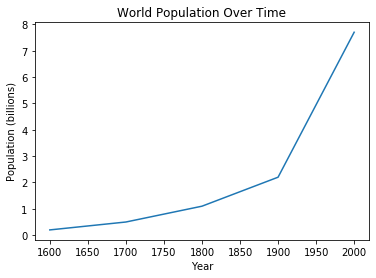

In [10]:
x, y = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]
plt.plot(x, y)
plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (billions)")
plt.show()

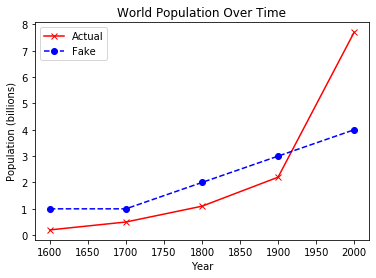

In [53]:
x1, y1 = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]
x2, y2 = [1600, 1700, 1800, 1900, 2000], [1, 1, 2, 3, 4]
plt.plot(x1, y1, "rx-", label="Actual")
plt.plot(x2, y2, "bo--", label="Fake")
plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (billions)")
plt.legend()
plt.savefig("population.jpg")
plt.show()


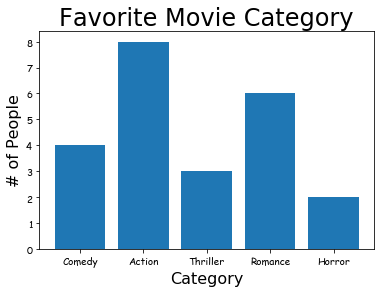

In [15]:
num_people, categories = [4, 8, 3, 6, 2], ["Comedy", "Action", "Thriller", "Romance", "Horror"]
plt.bar(categories, num_people)
plt.title("Favorite Movie Category", fontsize=24)
plt.xlabel("Category", fontsize=16)
plt.ylabel("# of People", fontsize=16)
plt.xticks(fontname="Fantasy")
plt.yticks(fontname="Fantasy")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

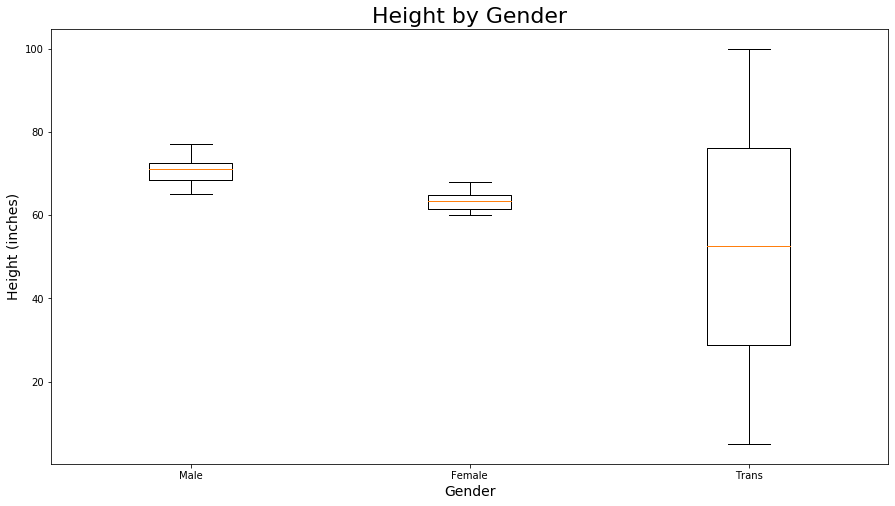

In [29]:
males, females = [72, 68, 65, 77, 73, 71, 69], [60, 65, 68, 61, 63, 64]
heights = [males, females]
plt.figure(figsize=(15, 8))
plt.boxplot(heights)
plt.xticks([1, 2], ["Male", "Female"])
plt.title("Height by Gender", fontsize=22)
plt.ylabel("Height (inches)", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

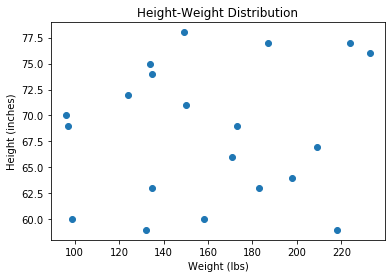

In [33]:
import random
random.seed(2)
height = [random.randint(58, 78) for x in range(20)]
weight = [random.randint(90, 250) for x in range(20)]
plt.scatter(weight, height)
plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")
plt.show

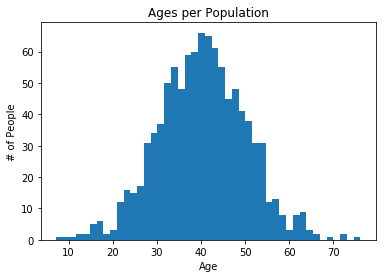

In [44]:
import numpy as np
np.random.seed(5)
ages = [np.random.normal(loc=40, scale=10) for x in range(1000)]
plt.hist(ages, bins = 45)
plt.title("Ages per Population")
plt.xlabel("Age")
plt.ylabel("# of People")
plt.show()

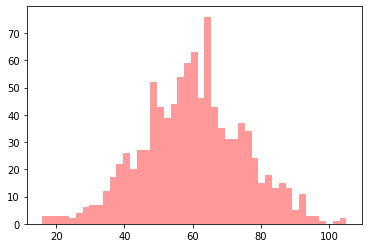

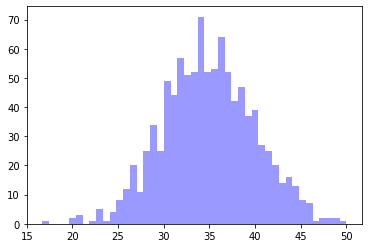

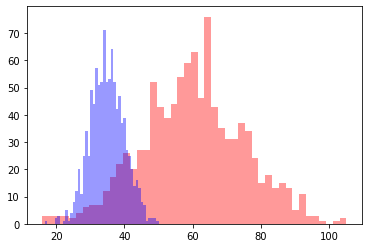

In [51]:
florida = [np.random.normal(loc=60, scale=15) for x in range(1000)]
california = [np.random.normal(loc=35, scale=5) for x in range(1000)]
plt.hist(florida, bins=45, color="r", alpha=0.4)
plt.show()

plt.hist(california, bins=45, color="b", alpha=0.4)
plt.show()

plt.hist(florida, bins=45, color="r", alpha=0.4)
plt.hist(california, bins=45, color="b", alpha=0.4)
plt.show()

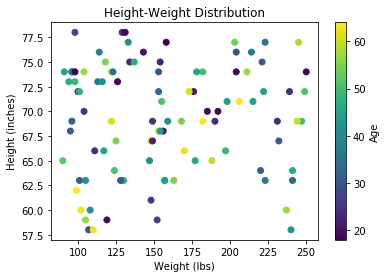

In [56]:
random.seed(2)
height = [randint(58, 78) for x in range(100)]
weight = [randint(90, 250) for x in range(100)]
age = [randint(18, 65) for x in range(100)]

plt.scatter(weight, height, c=age)
plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")
plt.colorbar(label="Age")
plt.show()

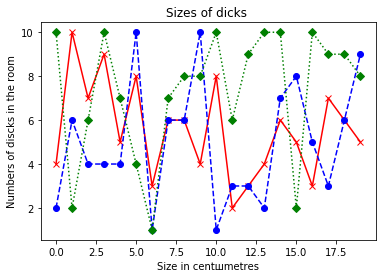

In [80]:
def generator():
    return [randint(1, 10) for x in range(20)]

def makeListRow():
    numbers = []
    x = 0
    for y in range(20):
        numbers.append(x)
        x += 1
    return numbers

y1, y2, y3 = generator(), generator(), generator()
x1 = x2 = x3 = makeListRow()

plt.plot(x1, y1, "rx-", label="Room 1")
plt.plot(x2, y2, "bo--", label="Room 2")
plt.plot(x3, y3, "gD:", label="Room 3")
plt.title("Sizes of dicks ")
plt.xlabel("Size in centшmetres")
plt.ylabel("Numbers of discks in the room")

plt.show()

[2, 0, 0, 0, 0]


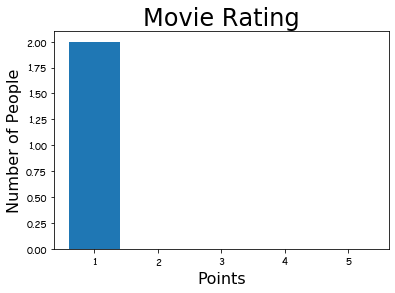

In [103]:
from IPython.display import clear_output

class movieRate():
    def __init__(self):
        self.rating = { 1: 0,
                        2: 0,
                        3: 0,
                        4: 0,
                        5: 0 }
    def renderPlotBar(self):
        plt.bar(list(self.rating.keys()), list(self.rating.values()))
        plt.title("Movie Rating", fontsize = 24)
        plt.xlabel("Points", fontsize = 16)
        plt.ylabel("Number of People", fontsize = 16)
        plt.xticks(fontname="Fantasy")
        plt.yticks(fontname="Fantasy")
        plt.show()
        
    def start(self):
        surveyIsOver = False
        
        while not surveyIsOver:
            rate = input("What would you rate this movie (1-5)? ")
            self.rating[int(rate)] += 1
            if input("Is there another user that would like to review? y/n ") == "n":
                print(self.rating)
                surveyIsOver = True
            clear_output()
                
        self.renderPlotBar()
            
survey = movieRate()
survey.start()

# Web Scraping

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
page = requests.get("http://arthurleej.com/e-love.html")
print(page)

<Response [200]>


In [3]:
print(page.content)

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\r<html>\r<head>\r\t<title>Essay on Love by Arthur Lee Jacobson</title>\r<meta name="description" content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson.">\r<meta name="keywords" content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington">\r<meta name="resource-type" content="document">\r<meta name="generator" content="BBEdit 4.5">\r<meta name="robots" content="all">\r<meta name="classification" content="Gardening">\r<meta name="distribution" content="global">\r<meta name="rating" content="general">\r<meta name="copyright" content="2001 Arthur Lee Jacobson">\r<meta name="author" content="eriktyme@eriktyme.com">\r<meta name="language" content="en-us">\r</head>\r<body background="images/background1a.jpg" bgcolor="#FFFFCC" text="#000000" link="#00

In [4]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>
   Essay on Love by Arthur Lee Jacobson
  </title>
  <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>
  <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>
  <meta content="document" name="resource-type"/>
  <meta content="BBEdit 4.5" name="generator"/>
  <meta content="all" name="robots"/>
  <meta content="Gardening" name="classification"/>
  <meta content="global" name="distribution"/>
  <meta content="general" name="rating"/>
  <meta content="2001 Arthur Lee Jacobson" name="copyright"/>
  <meta content="eriktyme@eriktyme.com" name="author"/>
  <meta content="en-us" name="language"/>
 </head>
 <body alink="#33CC33" background="images/background1a.jpg" b

In [5]:
title = soup.find("b")
print(title)
print(title.get_text())

<b>Love</b>
Love


In [7]:
poem_text = soup.find_all("b")
for text in poem_text:
    print(text.get_text())

Love
    Of the fourteen essays I'm writing, only this one treats an emotion. That love is the most important emotion is the deduction. I think other emotions may be as important, but are not so powerfully moving or interesting to most of us. Love is exciting. There is no need to justify choosing to write about it. Are not most songs love songs? Are not most novels stories featuring love?
    Love in its broad sense is the feeling of strong attraction, and often attachment and protection. It is felt towards other people, towards pets, towards inanimate objects, towards abstractions such as patriotism, religious matters, hobbies, and I suppose nearly everything. It is multifaceted, and includes ordinary self-love, chivalrous love, carnal or sexual love, friendly love, family love. It is an emotion that is closely related to certain others, such as hope. At its simplest level it is what we strongly like.
    I have a hunch that love, like the rose, owes much of its appeal to our mainstre

In [13]:
page = requests.get("https://github.com/Connor-SM")
print(page)
soup = BeautifulSoup(page.content, "html.parser")
username = soup.find("span", attrs={"class" : "vcard-username"})
print(username)
print(username.get_text())

<Response [200]>
<span class="p-nickname vcard-username d-block" itemprop="additionalName">Connor-SM</span>
Connor-SM


In [64]:
page = requests.get("http://arthurleej.com/e-love.html")
soup = BeautifulSoup(page.content, "html.parser")
print(soup.children)
for child in list(soup.children):
    print(type(child))
    #print(child.string)
    #print("\n\n\n")

<class 'bs4.element.Doctype'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


In [86]:
html = list(soup.children)[2]
x = 0
for section in html:
    print("\n\n Start of new section [{}]".format(x))
    print(section)
    x += 1



 Start of new section [0]
 


 Start of new section [1]
<head> <title>Essay on Love by Arthur Lee Jacobson</title> <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/> <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/> <meta content="document" name="resource-type"/> <meta content="BBEdit 4.5" name="generator"/> <meta content="all" name="robots"/> <meta content="Gardening" name="classification"/> <meta content="global" name="distribution"/> <meta content="general" name="rating"/> <meta content="2001 Arthur Lee Jacobson" name="copyright"/> <meta content="eriktyme@eriktyme.com" name="author"/> <meta content="en-us" name="language"/> </head>


 Start of new section [2]
 


 Start of new section [3]
<body alink="#33CC33" background="images/

In [87]:
head = list(html.children)[1]
x = 0
for item in head:
    print("\n\n New Tag [{}]".format(x))
    print(item)
    x += 1



 New Tag [0]
 


 New Tag [1]
<title>Essay on Love by Arthur Lee Jacobson</title>


 New Tag [2]
 


 New Tag [3]
<meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>


 New Tag [4]
 


 New Tag [5]
<meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>


 New Tag [6]
 


 New Tag [7]
<meta content="document" name="resource-type"/>


 New Tag [8]
 


 New Tag [9]
<meta content="BBEdit 4.5" name="generator"/>


 New Tag [10]
 


 New Tag [11]
<meta content="all" name="robots"/>


 New Tag [12]
 


 New Tag [13]
<meta content="Gardening" name="classification"/>


 New Tag [14]
 


 New Tag [15]
<meta content="global" name="distribution"/>


 New Tag [16]
 


 New Tag [17]
<meta content="general" name="rating"/>


 New Tag [18]
 


 New Tag [

In [79]:
title = list(head)[1]
print(title.string)
print(type(title.string))
print(title.get_text())

Essay on Love by Arthur Lee Jacobson
<class 'bs4.element.NavigableString'>
Essay on Love by Arthur Lee Jacobson


In [110]:
import re

page = requests.get("https://www.york.ac.uk/teaching/cws/wws/webpage1.html")
soup = BeautifulSoup(page.content, "html.parser")
x = 0
'''for child in list(soup.children):
    print("\n\nChild [{}]".format(x))
    print(type(child))
    #print(child)
    x += 1

x=0'''
html = list(soup.children)[0]
'''for section in html:
    print("\n\nSection [{}]".format(x))
    print(type(section))
    print(section)
    x += 1'''
    
body = list(html)[3]
body_text = body.get_text()
res = re.findall(r'\w+', body_text)
print("The number of words on the page is " + str(len(res)))
#print(res)
#print(len(res))
#print(body.get_text())

The number of words on the page is 616


In [70]:
import requests
from bs4 import BeautifulSoup

page = requests.get("https://en.wikipedia.org/wiki/List_of_current_National_Football_League_stadiums")
soup = BeautifulSoup(page.content, "html.parser")
list_of_stadiums = soup.find_all("table", attrs={"class" : "wikitable"})
#print(list_of_stadiums)
table_of_stadiums = soup.select("table.wikitable.sortable.plainrowheaders")
#print(table_of_stadiums)
x = 0
'''for child in list(table_of_stadiums):
    print(type(child))'''

table_of_stadiums = table_of_stadiums[0]
'''for child in list(table_of_stadiums):
    print("\n\nChild [{}]\n\n".format(x))
    print(type(child))
    x += 1
x = 0 '''

table_of_stadiums = list(table_of_stadiums.children)[1]
for child in list(table_of_stadiums):
    #print("\n\nChild [{}]\n\n".format(x))
    #print(type(child))
    #print(child)
    x += 1
    
x = 0 

titles = table_of_stadiums.find_all("th", attrs={"scope" : "row"})
#titles = list(titles)[0].find_all("a")

stadiums = []

for row in list(titles):
    title = row.find("a")
    stadiums.append(title["title"])
    
print("The number of the stadiums is: " + str(len(stadiums)))
    
'''print(titles[0]['title'])
print(list(titles))'''
  
#print(table_of_stadiums1)
#print(list(table_of_stadiums)[0])

The number of the stadiums is: 30


"print(titles[0]['title'])\nprint(list(titles))"

# Friday Project: Website Analysis.

In [1]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
from IPython.display import clear_output
import pandas as pd

In [25]:
def filterTag(element):
    if element.parent.name in ["style", "script", "head", "title", "meta", "[document]"]:
        return False
    if isinstance(element, Comment):
        return False
    return True

def filterWaste(word):
    bad_words = ["the", "a", "in", "of", "to", "you", "\xa0", "and", "at", "on", "for", "from", "is", "that", 
                 "his", "are", "be", "-", "as", "&", "they", "with", "how", "was", "her", "him", "i", "has", "|", ""]
    if word.lower() in bad_words:
        return False
    else:
        return True

def scrape(site):
    page = requests.get(site)
    soup = BeautifulSoup(page.content, "html.parser")
    text = soup.find_all(text=True)
    visible_text = filter(filterTag, text)
    word_count = {}
    for text in visible_text:
        words = text.replace("\n", ""). replace("\t", "").split(" ")
        words = list(filter(filterWaste, words))
        for word in words:
            if word != "":
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
    word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)
    return word_count[:7]

def displayResult(words, site):
    count = [item[1] for item in words][::-1]
    word = [item[0] for item in words][::-1]
    plt.figure(figsize = (20, 10))
    plt.bar(word, count)
    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname = "Sans Serif", fontsize = 24)
    plt.xlabel("Words", fontsize = 24)
    plt.ylabel("# of Appearances", fontsize = 24)
    plt.xticks(fontname = "Sans Serif", fontsize = 20)
    plt.yticks(fontname = "Sans Serif", fontsize = 20)
    plt.show()

while input("Would you like to scrape a website (y/n)? ") == "y":
    try:
        clear_output()
        site = input("Enter a website to analyze: ")
        top_words = scrape(site)
        top_word = top_words[0]
        print("The top word is: {}".format(top_word[0]))
        displayResult(top_words, site)
    except:
        print("Something went wrong, please try again.")
    
    '''clear_output()
    site = "https://www.microsoft.com/en-us"
    top_words = scrape(site)
    top_word = top_words[0]
    print("The top word is: {}".format(top_word[0]))
    displayResult(top_words, site)'''
print("Thanks for analyzing! Come back again!")



Would you like to scrape a website (y/n)? n
Thanks for analyzing! Come back again!


You may add additinal words to exclude (separated by a comma) or live the field empty
The top word is: Mcrosoft


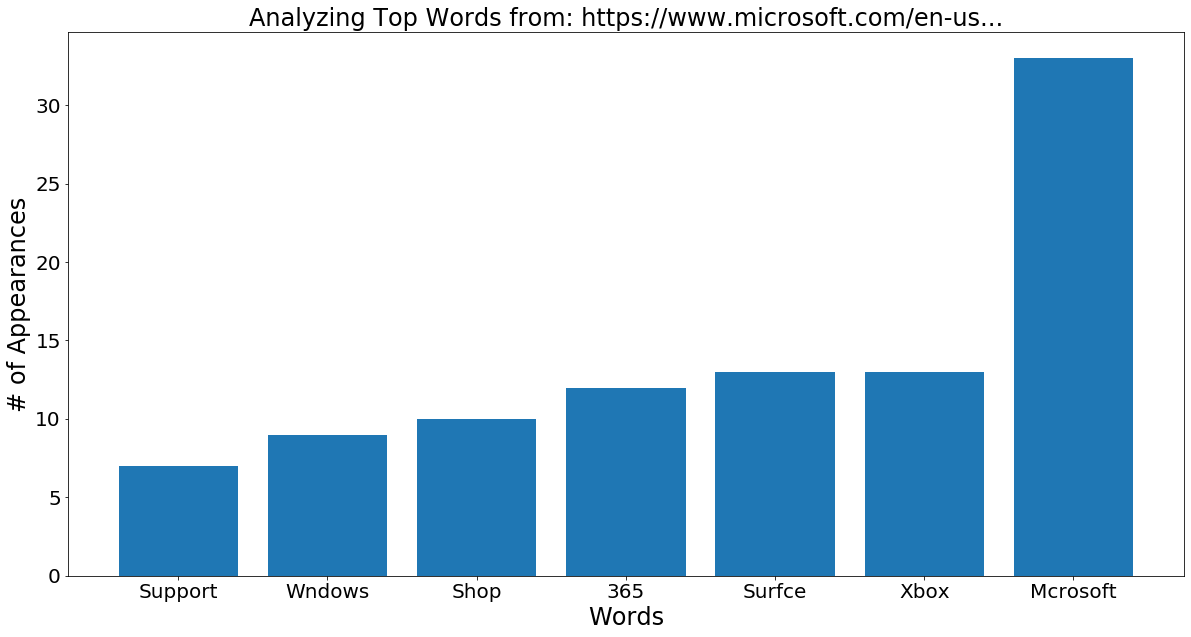

Would you like to save the plot (y/n)? y
How would you like to call the image file?y
The plot has been saved.
Would you like to save the chart to csv (y/n)?y


PermissionError: [Errno 13] Permission denied: 'microsoft_frequent_words.csv'

In [26]:
bad_words = ["the", "a", "in", "of", "to", "you", "\xa0", "and", "at", "on", "for", "from", "is", "that", 
                 "his", "are", "be", "-", "as", "&", "they", "with", "how", "was", "her", "him", "i", "has", 
             "|", "", "(", ")", "your"]

def filterTag(element):
    if element.parent.name in ["style", "script", "head", "title", "meta", "[document]"]:
        return False
    if isinstance(element, Comment):
        return False
    return True

def filterWaste(word):
    if word.lower() in bad_words:
        return False
    else:
        return True
    
def filterWords(x):
    return False if x in bad_words else True

def scrape(site):
    page = requests.get(site)
    soup = BeautifulSoup(page.content, "html.parser")
    text = soup.find_all(text=True)
    visible_text = filter(filterTag, text)
    word_count = {}
    dfWords = pd.DataFrame.from_dict({"words": [], "score": []})
    dfWords = dfWords.astype({"words": "str", "score": "int"})
    for text in visible_text:
        words = text.replace("\n", ""). replace("\t", "").split(" ")
        words = list(filter(filterWaste, words))
        for word in words:
            if word != "":
                word = "".join(filter(filterWords, word))
                foundWord = dfWords[dfWords.words.str.contains(word, case=False)]
                if not foundWord.empty:
                    indexWord = foundWord.iloc[0].name
                    dfWords.loc[[indexWord], ["score"]] += 1
                else:
                    dfWords = dfWords.append({"words": word, "score": 1}, ignore_index=True)
    
    dfWords = dfWords.sort_values("score", ascending = False)
    return dfWords

def displayResult(df, site):
    df = df.sort_values("score")
    count = list(df["score"])
    word = list(df["words"])
    plt.figure(figsize = (20, 10))
    plt.bar(word, count)
    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname = "Sans Serif", fontsize = 24)
    plt.xlabel("Words", fontsize = 24)
    plt.ylabel("# of Appearances", fontsize = 24)
    plt.xticks(fontname = "Sans Serif", fontsize = 20)
    plt.yticks(fontname = "Sans Serif", fontsize = 20)
    fig1 = plt.gcf()
    plt.show()
    return fig1
    
    
def addBadWords():
    additionalWords = input("You may add additinal words to exclude (separated by a comma) or live the field empty")
    if additionalWords:
        additionalWords = additionalWords.split(",")
        for word in additionalWords:            
            bad_words.append(word.lower().strip())

def savePlot(chartPlot):
    if input("Would you like to save the plot (y/n)? ") == "y":
        imgName = "" 
        while not imgName:
            imgName = input("How would you like to call the image file?")
        chartPlot.savefig(imgName + ".jpg")    
        print("The plot has been saved.")

def saveCSV(df, site):
    if input("Would you like to save the chart to csv (y/n)?"):
        name = site.split(".")[1] + "_frequent_words.csv"
        df.to_csv(name)
        
            
while input("Would you like to scrape a website (y/n)? ") == "y":
    '''try:
        clear_output()
        site = input("Enter a website to analyze: ")
        top_words = scrape(site)
        top_word = top_words[0]
        print("The top word is: {}".format(top_word[0]))
        displayResult(top_words, site)
    except:
        print("Something went wrong, please try again.")'''
    
    clear_output()
    site = "https://www.microsoft.com/en-us"
    addBadWords()
    top_words = scrape(site)
    top_word = top_words.head(7).iloc[0]
    print("The top word is: {}".format(top_word.loc["words"]))
    fig1 = displayResult(top_words.head(7), site)
    savePlot(fig1)
    saveCSV(top_words, site)
print("Thanks for analyzing! Come back again!")



In [80]:
import pandas as pd
words = {'Skip': 1, 'main': 1, 'content': 1, 'Microsoft': 33, 'Office': 5, 'Windows': 9, 'Surface': 13, 'Xbox': 11}
words = {"words": list(words.keys()), "score": list(words.values())}
#print(words)
df = pd.DataFrame.from_dict(words)
df = df.sort_values("score", ascending = False)
#print(df.tail(7))
indexWord = df[df.words.str.contains('xbox', case=False)].iloc[0].name
print(df.loc[indexWord])
df.loc[[indexWord], ["score"]] += 1
#print(df[df.words.str.contains('xbox', case=False)].iloc[0].name)
#print(indexWord)

#dfWords.loc[dfWords["words"] == word, ["score"]] += 1
print(df.tail(7))
#print(df.tail(7).iloc[0])

words    Xbox
score      11
Name: 7, dtype: object
     words  score
6  Surface     13
7     Xbox     12
5  Windows      9
4   Office      5
0     Skip      1
1     main      1
2  content      1


In [24]:
df1 = pd.read_csv("microsoft_frequent_words.csv", index_col=0)
df1.head()

,words,score
3,Mcrosoft,33
7,Surfce,13
8,Xbox,13
4,365,12
24,Shop,10
